# RANDOM FOREST ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stress level.csv')
df.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,NaN,0.0,78.0,NaN,56,24.0,21.0,64.0,3
1,16.0,NaN,70.0,18.0,92,22.0,13.0,30.0,4
2,115.0,77.0,101.0,5.0,88,23.0,24.0,68.0,2
3,140.0,43.0,88.0,0.0,66,23.0,11.0,165.0,0
4,69.0,NaN,69.0,NaN,79,21.0,18.0,189.0,2


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen ', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [5]:
df.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
2,115.0,77.0,101.0,5.0,88,23.0,24.0,68.0,2
3,140.0,43.0,88.0,0.0,66,23.0,11.0,165.0,0
5,107.0,51.0,88.0,11.0,83,25.0,16.0,168.0,3
6,77.0,80.0,101.0,16.0,99,25.0,24.0,113.0,4
7,90.0,56.0,88.0,7.0,97,20.0,4.0,38.0,3


In [6]:
x1 = df.drop(labels='stress level', axis=1)
y1 = df.loc[:,'stress level']

In [7]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1: 5946, 3: 5872, 4: 5796, 2: 5763, 0: 4353})
OVER SAMPLING DATA COUNT  :  Counter({2: 5946, 0: 5946, 3: 5946, 4: 5946, 1: 5946})


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  23784
NUMBER OF TEST DATASET      :  5946
TOTAL NUMBER OF DATASET    :  29730


In [9]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  23784
NUMBER OF TEST DATASET      :  5946
TOTAL NUMBER OF DATASET    :  29730


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
predicted = RF.predict(x_test)

In [13]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF RandomForestClassifier:\n\n',cr)

THE CLASSIFICATION REPORT OF RandomForestClassifier:

               precision    recall  f1-score   support

           0       0.43      0.88      0.57      1189
           1       0.40      0.29      0.34      1189
           2       0.39      0.29      0.33      1189
           3       0.40      0.30      0.34      1190
           4       0.41      0.28      0.33      1189

    accuracy                           0.41      5946
   macro avg       0.40      0.41      0.38      5946
weighted avg       0.40      0.41      0.38      5946



In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RandomForestClassifier:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RandomForestClassifier:


 [[1051   46   33   31   28]
 [ 347  347  330   89   76]
 [ 377  314  341   83   74]
 [ 341   89   92  355  313]
 [ 354   74   86  339  336]]


In [15]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RF, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [22.56979482 23.59569458 51.2781702  52.75815674 35.95694585]


In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RandomForestClassifier IS :",accuracy.mean()*100)

THE ACCURACY SCORE OF RandomForestClassifier IS : 37.231752438614194


In [17]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RandomForestClassifier IS :",hl*100)

THE HAMMING LOSS OF RandomForestClassifier IS : 59.1321897073663


THE CONFUSION MATRIX SCORE OF RandomForestClassifier:


[[1051   46   33   31   28]
 [ 347  347  330   89   76]
 [ 377  314  341   83   74]
 [ 341   89   92  355  313]
 [ 354   74   86  339  336]]


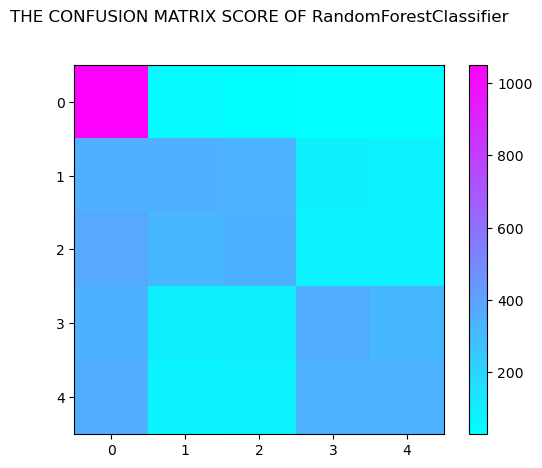

In [18]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RandomForestClassifier\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RandomForestClassifier:\n\n')
print(cm)
plot_confusion_matrix(cm)

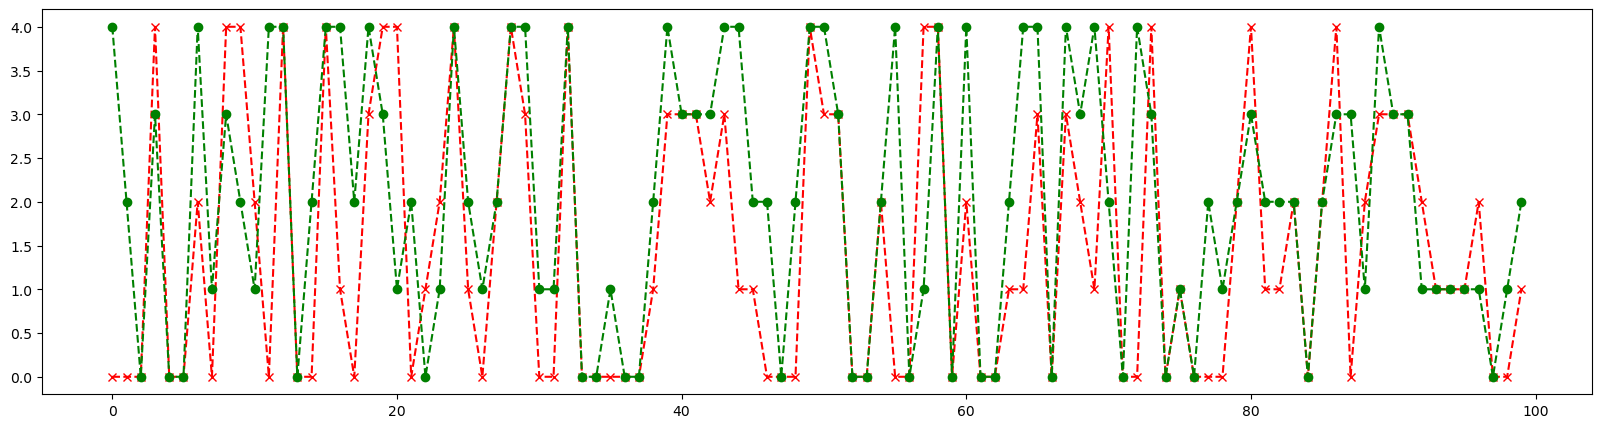

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()